<a href="https://colab.research.google.com/github/asupraja3/ml-ng-notebooks/blob/main/CostFunction2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optional Lab: Cost Function for Logistic Regression

**Goals**
- Understand and implement the **logistic loss** for a single example.
- Combine per-example losses into the overall **cost function** $J(w,b)$.
- Build intuition by plotting a toy dataset and checking cost values for different parameters.

> This notebook mirrors the structure and spirit of Andrew Ng’s optional lab and is fully executable.

In [2]:
# === Imports & plotting defaults ===
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['font.size'] = 12


## Dataset

We'll reuse the classic separable 2D toy dataset that appears across the decision boundary labs.

- Features: $x = [x_0, x_1]$
- Labels: $y \in \{0,1\}$

Below, we also define a small helper to plot the data.

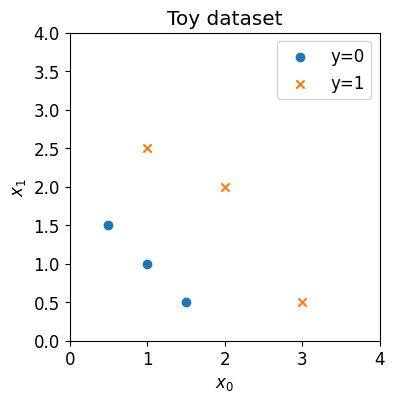

In [3]:
# Toy dataset (m=6 examples, n=2 features)
X = np.array([
    [0.5, 1.5],
    [1.0, 1.0],
    [1.5, 0.5],
    [3.0, 0.5],
    [2.0, 2.0],
    [1.0, 2.5]
], dtype=float)

y = np.array([0, 0, 0, 1, 1, 1], dtype=float)

def plot_data(X, y, ax=None):
    # Plot 2D points with different markers for y=0 vs y=1.
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(4,4))
    pos = y == 1
    neg = y == 0
    ax.scatter(X[neg,0], X[neg,1], marker='o', label='y=0')
    ax.scatter(X[pos,0], X[pos,1], marker='x', label='y=1')
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.legend(loc='upper right')
    return ax

# Quick preview
ax = plot_data(X, y)
ax.set_title('Toy dataset')
plt.show()


## Cost function recap

For logistic regression, with parameters $w \in \mathbb{R}^n$ and $b \in \mathbb{R}$:
- Linear score: $z^{(i)} = w^\top x^{(i)} + b$
- Sigmoid: $f_{w,b}(x^{(i)}) = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}$

**Logistic loss (single example)**
$$\text{loss}(f_{w,b}(x^{(i)}), y^{(i)}) = -y^{(i)}\log(f_{w,b}(x^{(i)})) - (1-y^{(i)})\log(1-f_{w,b}(x^{(i)}))$$

**Cost over the dataset** (average loss across $m$ examples)
$$J(w,b) = \frac{1}{m}\sum_{i=1}^{m} \text{loss}(f_{w,b}(x^{(i)}), y^{(i)})$$

In [4]:
# === Core functions ===
def sigmoid(z):
    # Numerically stable sigmoid
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def logistic_loss_single(y_i, yhat_i):
    # Logistic loss for a single example
    eps = 1e-15
    yhat_i = np.clip(yhat_i, eps, 1 - eps)
    return - (y_i * np.log(yhat_i) + (1 - y_i) * np.log(1 - yhat_i))

def compute_cost_logistic(X, y, w, b):
    # Average logistic cost J(w,b) over all m examples (loop version)
    m, n = X.shape
    cost_sum = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_i = sigmoid(z_i)
        cost_sum += logistic_loss_single(y[i], f_i)
    return cost_sum / m


## Sanity check

Let's evaluate the cost for a simple parameter choice: $w=[1,1]$, $b=-3$.

In [5]:
w = np.array([1.0, 1.0])
b = -3.0
cost = compute_cost_logistic(X, y, w, b)
print('Cost for w=[1,1], b=-3  ->', cost)


Cost for w=[1,1], b=-3  -> 0.36686678640551745


## Decision boundary intuition

For any fixed $w$, changing $b$ shifts the decision boundary. Below we draw two lines (same slope, different intercepts) and compare their costs.

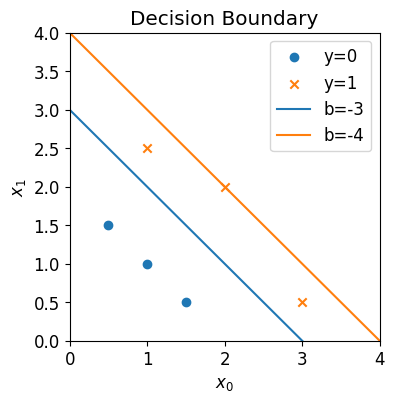

Cost for b = -3 : 0.36686678640551745
Cost for b = -4 : 0.5036808636748461


In [6]:
def plot_lines_and_data(w, b_list):
    ax = plot_data(X, y)
    x0 = np.linspace(0, 4, 100)
    for b in b_list:
        if abs(w[1]) < 1e-12:
            continue
        x1 = -(w[0]*x0 + b) / w[1]
        ax.plot(x0, x1, label=f'b={b:g}')
    ax.set_title('Decision Boundary')
    ax.legend(loc='upper right')
    plt.show()

w = np.array([1.0, 1.0])
b1, b2 = -3.0, -4.0
plot_lines_and_data(w, [b1, b2])
print('Cost for b = -3 :', compute_cost_logistic(X, y, w, b1))
print('Cost for b = -4 :', compute_cost_logistic(X, y, w, b2))


## (Optional) Vectorized cost

The same cost can be implemented without explicit Python loops for speed on large datasets.

In [7]:
def compute_cost_logistic_vectorized(X, y, w, b):
    z = X @ w + b
    f = sigmoid(z)
    eps = 1e-15
    f = np.clip(f, eps, 1 - eps)
    return np.mean(- (y * np.log(f) + (1 - y) * np.log(1 - f)))

w = np.array([1.0, 1.0])
b = -3.0
print('Looped    :', compute_cost_logistic(X, y, w, b))
print('Vectorized:', compute_cost_logistic_vectorized(X, y, w, b))


Looped    : 0.36686678640551745
Vectorized: 0.36686678640551745


## What to remember
- **Loss** is per-example; **cost** averages losses over all examples.
- You typically use **gradient descent** (or variants) to find $(w,b)$ that minimize the cost.
- For fixed $w$, changing $b$ shifts the decision boundary—reflected in different costs.